In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

from detector import *

In [2]:
# matplotlib config
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rc('font', family='serif', serif="cmr10", size=16)
plt.rc('mathtext', fontset='cm', rm='serif')
plt.rc('axes', unicode_minus=False)

plt.rcParams['axes.formatter.use_mathtext'] = True

For each file in the demo folder we detect Mike's iris and crop him out of the image.

In [3]:
mike_detector = MikeWazowskiDetector()

files = glob('./demo/*.jpg')
results = []

for file in files:
    im = mike_detector.load_image(file)
    mike = mike_detector.find_mike(im, draw_bbox=False)
    results.append(cv.resize(square_crop(rect_crop(im, mike)), (128,128), interpolation=cv.INTER_AREA))

plotting the results

<ipython-input-6-be47472a9cb6>:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


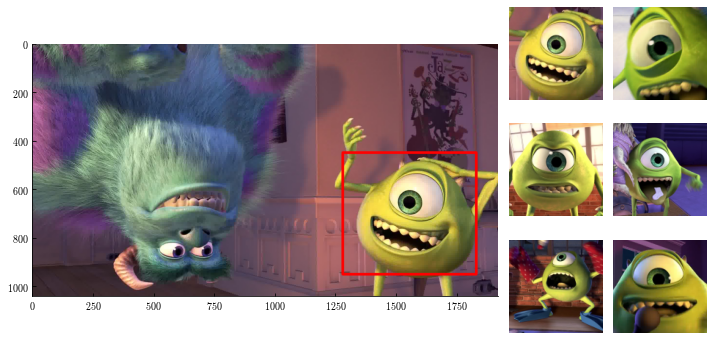

In [6]:
# generate uncropped for the first image
im = mike_detector.load_image('./demo/1.jpg')
mike = mike_detector.find_mike(im)

fig = plt.figure(constrained_layout=True, figsize=(10,5))
gs = fig.add_gridspec(3, 3, width_ratios=[5,1,1])
ax00 = fig.add_subplot(gs[:, 0])
ax = np.array([[fig.add_subplot(gs[i,j+1]) for i in range(3)] for j in range(2)])

ax00.imshow(im)

for axi, result in zip(ax.flatten(), results):
    axi.imshow(result)
    axi.axis('off')

fig.tight_layout()
fig.savefig('demo.png')